In [7]:
import gzip
import brotli
import blosc

import timeit

import matplotlib.pyplot as plt
import numpy as np


In [2]:
with open("scripts/0-512_0-512_64-80", "rb") as rawfile:
    raw_data = rawfile.read()



In [3]:
comp_data = gzip.compress(raw_data)
gz_size = len(comp_data)
print("gzip default", len(comp_data))
gzip_res = %timeit -n1 -r5 -o gzip.compress(raw_data)


gzip default 6539684
497 ms ± 20.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [4]:
br_results, br_size, qq = [], [],[]
for q in range(1, 9):
    comp_data = brotli.compress(raw_data, quality=q)
    print(f"brotli q={q}", len(comp_data))
    br_size.append(len(comp_data))
    q_res = %timeit -n1 -r5 -o brotli.compress(raw_data, quality=q)
    br_results.append(q_res)
    qq.append(q)


brotli q=1 6698383
42.2 ms ± 4.99 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=2 6523722
108 ms ± 2.54 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=3 6500608
125 ms ± 3.54 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=4 6634749
112 ms ± 518 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=5 6111878
669 ms ± 9.93 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=6 6043467
947 ms ± 3.54 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=7 6035479
1.47 s ± 10.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli q=8 6034647
2.06 s ± 8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [18]:
blosc_results, blosc_size, blosc_q = [], [], []
for q in range(3, 10):
    comp_data= blosc.compress(raw_data, clevel=q)
    print(f"blosc q={q}", len(comp_data))
    blosc_size.append(len(comp_data))
    q_res = %timeit -n1 -r5 -o blosc.compress(raw_data, clevel=q)
    blosc_results.append(q_res)
    blosc_q.append(q)


blosc q=3 8388624
7.06 ms ± 876 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=4 8380400
7.35 ms ± 1.54 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=5 8277772
9.5 ms ± 608 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=6 6783979
12.3 ms ± 1.37 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=7 6458747
11.2 ms ± 481 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=8 6429311
11.7 ms ± 635 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc q=9 6342151
13.1 ms ± 285 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


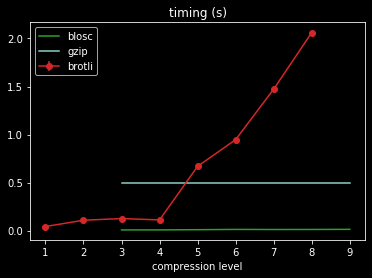

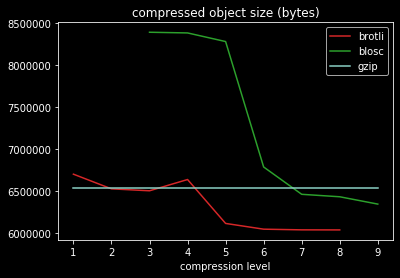

In [34]:
fig, ax1 = plt.subplots()
y = [sum(t.timings)/len(t.timings) for t in br_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in br_results]
h1 = ax1.errorbar(qq, y, yerr, fmt="-o", color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_results]
h2 = ax1.plot(blosc_q, y, color='tab:green', label="blosc")

h3 = ax1.plot(blosc_q, [np.mean(gzip_res.timings) for xi in blosc_q], label="gzip")

ax1.legend()
ax1.set_title("timing (s)")
ax1.set_xlabel("compression level")

fig, ax2 = plt.subplots()
ax2.plot(qq, br_size, color='tab:red', label="brotli")
ax2.plot(blosc_q, blosc_size, color="tab:green", label="blosc")
ax2.plot(x, [gz_size for xi in x], label="gzip")
ax2.legend()

ax2.set_title("compressed object size (bytes)")
ax2.set_xlabel("compression level")

plt.show()
